### COM404E Project on  Breast Cancer using ML

#### loading the required modules

In [82]:
# load the required modules
# for data analysis and manipulation
import pandas as pd
import numpy as np
# module for visualization
import seaborn as sns
import matplotlib.pyplot as plt
#feature engineering
from sklearn.decomposition import PCA
#for data scaling
from sklearn.preprocessing import StandardScaler
#for splitting dataset
from sklearn.model_selection import train_test_split
# for KNN model
from sklearn.neighbors import KNeighborsClassifier
# for decision tree model
from sklearn.tree import DecisionTreeClassifier
# for random forest model
from sklearn.ensemble import RandomForestClassifier
#for fitting SVM model
from sklearn.svm import SVC
#for displaying evaluation metrics
from sklearn.metrics import (
    classification_report,
    ConfusionMatrixDisplay, 
    confusion_matrix, 
    accuracy_score
)
#for file operations
import os


#### a. loading the dataset
the breast cancer for this assignment was taken from the Kaggle datasets Repository using the following url: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

In [2]:
breast_cancer_data = pd.read_csv(r'./breast-cancer-data/breast_cancer_data.csv')

#### b) Display the data frame information

In [3]:
# display the data information
breast_cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

#### c) Display the first and last tuples of the data set

In [4]:
# first rows of the data
breast_cancer_data.head()
# last rows of the data
breast_cancer_data.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


#### d) Display the descriptive statistics

In [5]:
breast_cancer_data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


#### e) Display the class label distribution

In [6]:
# using the value_counts() function to display the distribution of diagnosis
# B stands for benign while M stands for malignant
breast_cancer_data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

#### f) Use seaborn to display count plot for the class label

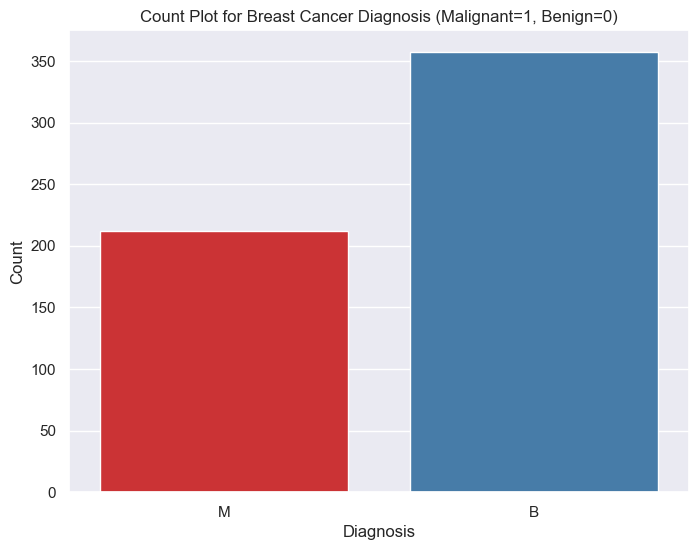

In [128]:
# Create a count plot for the class labels
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(x=breast_cancer_data.diagnosis, palette="Set1")

# Set plot labels
plt.title("Count Plot for Breast Cancer Diagnosis (Malignant=1, Benign=0)")
plt.xlabel("Diagnosis")
plt.ylabel("Count")

# Show the plot
plt.show()

#### g) Use seaborn to display a joint plot with any two variables of your choice

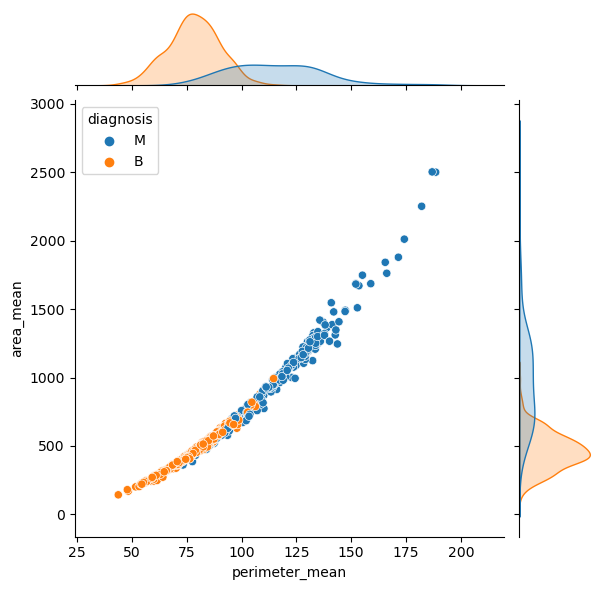

In [8]:
sns.jointplot(data=breast_cancer_data, x="perimeter_mean", y="area_mean",hue="diagnosis")
plt.show()

#### h) Determine based in the data set, whether you want to use category encoders
since the data we are using contains category column, we are going to perform category encoding.Category Encoders is used to improve model performance when we have nominal or ordinal data that may provide value. This is accomplished using the pd.get_dummies() function as shown below.

In [92]:
# category encoding
y_num = pd.get_dummies(breast_cancer_data.diagnosis)

#### i) Split the data such that 25% is reserved testing

In [93]:
# feature variables and target variables
X = breast_cancer_data.drop(['id','diagnosis','Unnamed: 32'], axis=1)
y = y_num['M'] # Malignant as target variable
# split x and y into train and test sets reserving 25% for testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25,  random_state = 1)

#### j) Show the shape of training set and the test set

In [94]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((426, 30), (143, 30))

#### k) Train a model using K-NN 

In [95]:
K = []
training = []
test = []
scores = {}
for k_neighbors in range(3, 25):
    knn_classifier = KNeighborsClassifier(n_neighbors = k_neighbors)
    knn_classifier.fit(X_train, y_train)
    training_score = knn_classifier.score(X_train, y_train)
    test_score = knn_classifier.score(X_test, y_test)
    K.append(k_neighbors)
    training.append(training_score)
    test.append(test_score)
    scores[k_neighbors] = [training_score, test_score]

##### a. Show the confusion matrix

In [121]:
# predicted values
knn_y_pred = knn_classifier.predict(X_test)
# confusion matrix
knn_conf_matrix = confusion_matrix(y_test, knn_y_pred)
print(knn_conf_matrix)

[[85  3]
 [10 45]]


##### b. Show the heat map

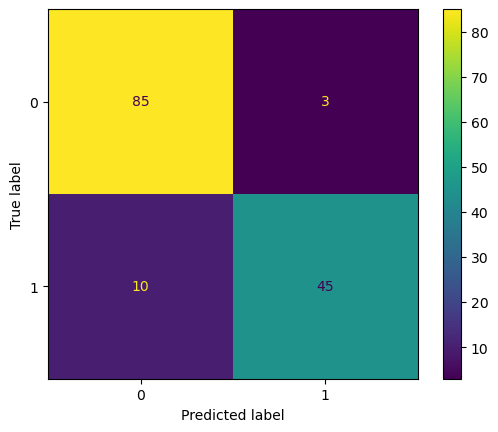

In [122]:
# plot the confusion matrix heatmap
conf_mat_disp = ConfusionMatrixDisplay(knn_conf_matrix, display_labels=knn_classifier.classes_)
conf_mat_disp.plot()
plt.show()

##### c. Show the classification accuracy


In [98]:
knn_accuracy = accuracy_score(y_test, y_pred)
print(f"The Accuracy for the K-Nearest Neigbors is: {np.round(knn_accuracy*100, 2)}%")

The Accuracy for the K-Nearest Neigbors is: 90.91%


##### d. Compare the training and testing accuracy

In [99]:
# predict the training set
pred_X_train = knn_classifier.predict(X_train)
# predict the test set
pred_X_test = knn_classifier.predict(X_test)
# print the accuracy
print(f"Accuracy for training set: {np.round(accuracy_score(y_train, pred_X_train)*100, 2)}%")
print(f"Accuracy for testing set: {np.round(accuracy_score(y_test, pred_X_test)*100,2)}%")

Accuracy for training set: 92.96%
Accuracy for testing set: 90.91%


#### l) Train a model using SVM

In [100]:
# SVM model
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

SVC()

##### a. Show the confusion matrix

In [101]:
# predict using the SVM model
svm_y_pred = svm_classifier.predict(X_test)
# confusion matrix
svm_conf_matrix = confusion_matrix(y_test, svm_y_pred)
svm_conf_matrix


array([[86,  2],
       [11, 44]], dtype=int64)

##### b. Show the heat map

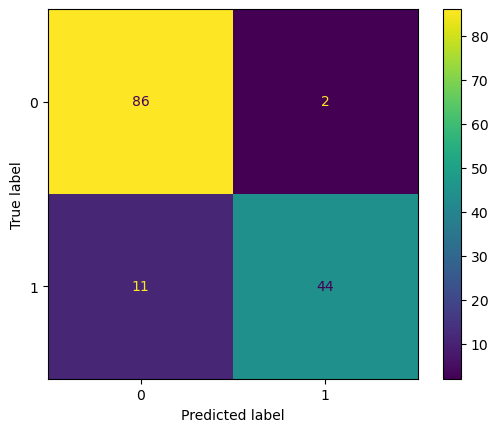

In [102]:
# heat map for the confusion matrix
# plot the confusion matrix
conf_mat_disp = ConfusionMatrixDisplay(svm_conf_matrix, display_labels=svm_classifier.classes_)
conf_mat_disp.plot()
plt.show()

##### c. Show the classification accuracy

In [103]:
svc_accuracy = accuracy_score(y_test, svm_y_pred)
print(f"The Accuracy for the Support Vector Machine is: {np.round(svc_accuracy*100, 2)}%")

The Accuracy for the Support Vector Machine is: 90.91%


##### d. Compare the training and testing accuracy

In [104]:
# predict the training set
pred_X_train = svm_classifier.predict(X_train)
# predict the test set
pred_X_test = svm_classifier.predict(X_test)
# print the accuracy
print(f"Accuracy for training set: {np.round(accuracy_score(y_train, pred_X_train)*100, 2)}%")
print(f"Accuracy for testing set: {np.round(accuracy_score(y_test, pred_X_test)*100,2)}%")

Accuracy for training set: 92.49%
Accuracy for testing set: 90.91%


#### m) Train a model using Decision Tree

In [105]:
# decision tree model
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

##### a. Show the confusion matrix

In [106]:
# prediction for the model
decision_tree_pred = decision_tree_classifier.predict(X_test)
decision_tree_mat = confusion_matrix(y_test, decision_tree_pred)
print(decision_tree_mat)

[[85  3]
 [ 5 50]]


##### b. Show the heat map

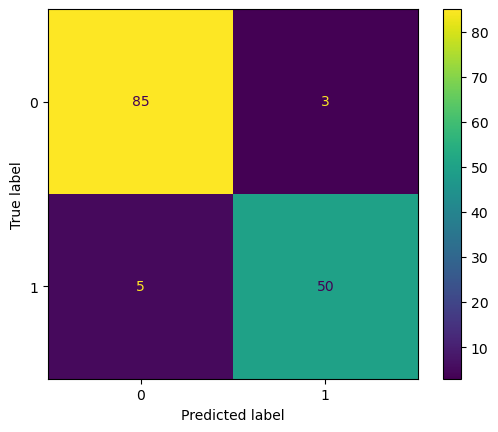

In [111]:
# plot the confusion matrix heatmap
conf_mat_disp = ConfusionMatrixDisplay(decision_tree_mat, display_labels=decision_tree_classifier.classes_)
conf_mat_disp.plot()
plt.show()

##### c. Show the classification accuracy

In [112]:
decision_tree_accuracy = accuracy_score(y_test, decision_tree_pred)
print(f"The Accuracy for the Decision Tree Model is: {np.round(decision_tree_accuracy*100, 2)}%")

The Accuracy for the Decision Tree Model is: 94.41%


##### d. Compare the training and testing accuracy

In [113]:
# predict the training set
pred_X_train = decision_tree_classifier.predict(X_train)
# predict the test set
pred_X_test = decision_tree_classifier.predict(X_test)
# print the accuracy
print(f"Accuracy for training set: {np.round(accuracy_score(y_train, pred_X_train)*100, 2)}%")
print(f"Accuracy for testing set: {np.round(accuracy_score(y_test, pred_X_test)*100,2)}%")

Accuracy for training set: 100.0%
Accuracy for testing set: 94.41%


#### n) Train a model using Random Forest

In [114]:
# random forest model
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train, y_train)

RandomForestClassifier()

##### a. Show the confusion matrix

In [115]:
# prediction for the model
random_forest_pred = random_forest_classifier.predict(X_test)
random_forest_mat = confusion_matrix(y_test, random_forest_pred)
print(random_forest_mat)

[[85  3]
 [ 4 51]]


##### b. Show the heat map

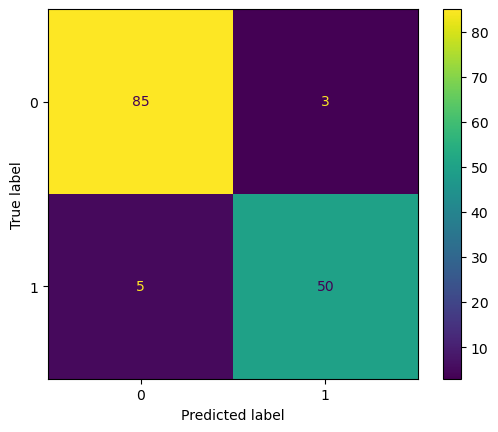

In [118]:
# plot the confusion matrix heatmap
rf_conf_mat_disp = ConfusionMatrixDisplay(random_forest_mat, display_labels=random_forest_classifier.classes_)
conf_mat_disp.plot()
plt.show()

##### c. Show the classification accuracy

In [119]:
random_forest_accuracy = accuracy_score(y_test, random_forest_pred)
print(f"The Accuracy for the Random Forest Model is: {np.round(random_forest_accuracy*100, 2)}%")

The Accuracy for the Random Forest Model is: 95.1%


##### d. Compare the training and testing accuracy

In [120]:
# predict the training set
pred_X_train = random_forest_classifier.predict(X_train)
# predict the test set
pred_X_test = random_forest_classifier.predict(X_test)
# print the accuracy
print(f"Accuracy for training set: {np.round(accuracy_score(y_train, pred_X_train)*100, 2)}%")
print(f"Accuracy for testing set: {np.round(accuracy_score(y_test, pred_X_test)*100,2)}%")

Accuracy for training set: 100.0%
Accuracy for testing set: 95.1%


#### Demonstrate by way of a plot, which ml algorithm performs better from your results above.

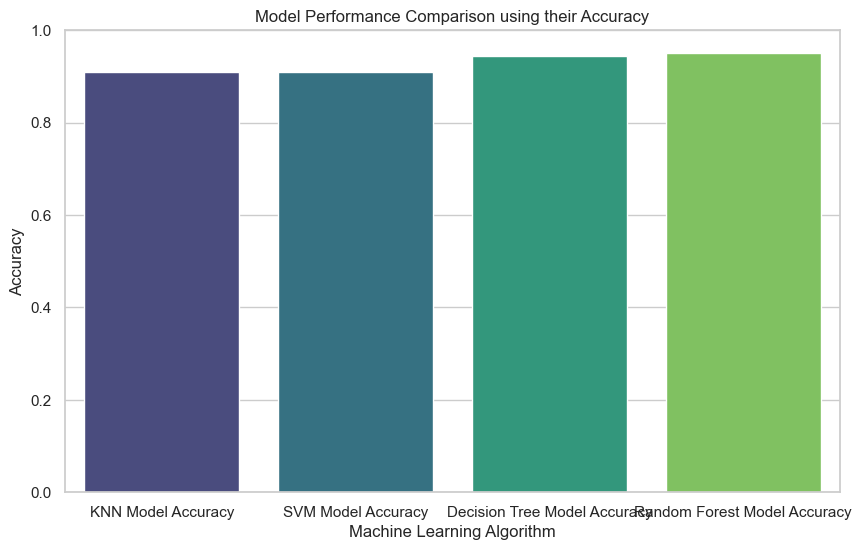

In [129]:
# dict for the accuracy results for all models
models_accuracy_results = {
    'KNN Model Accuracy':knn_accuracy,
    "SVM Model Accuracy":svc_accuracy,
    "Decision Tree Model Accuracy":decision_tree_accuracy,
    "Random Forest Model Accuracy":random_forest_accuracy,
}
# creating a barplot for the results above
# Create a plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plot = sns.barplot(x=list(models_accuracy_results.keys()), y=list(models_accuracy_results.values()), palette="viridis")
plot.set(xlabel="Machine Learning Algorithm", ylabel="Accuracy", title="Model Performance Comparison using their Accuracy")
plt.ylim(0, 1)  # Set the y-axis limit to represent accuracy between 0 and 1
plt.show()

 The most accurate model in predicting malignant breast cancer diagnosis is the random Forest model with an accuracy of 95.1%